🔍 Data Cleaning...
Missing values per column:
student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB
None

✨ Quick Stats:
       hours_studied  sleep_hours  attendance_percent  previous_scores  \
count     200.000000   200.000000          200.000000       200.000000   
mean        6.325500     6.622000           74.8

C:\Users\TEMP.ABDO\AppData\Local\Temp\ipykernel_13520\3475312638.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=attendance_bins, y=df['exam_score'], palette='Blues_r', ax=axes[0,0])
C:\Users\TEMP.ABDO\AppData\Local\Temp\ipykernel_13520\3475312638.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_means = df.groupby(sleep_bins)['exam_score'].mean().reindex(['<5','5-7','7+'])
C:\Users\TEMP.ABDO\AppData\Local\Temp\ipykernel_13520\3475312638.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.bar

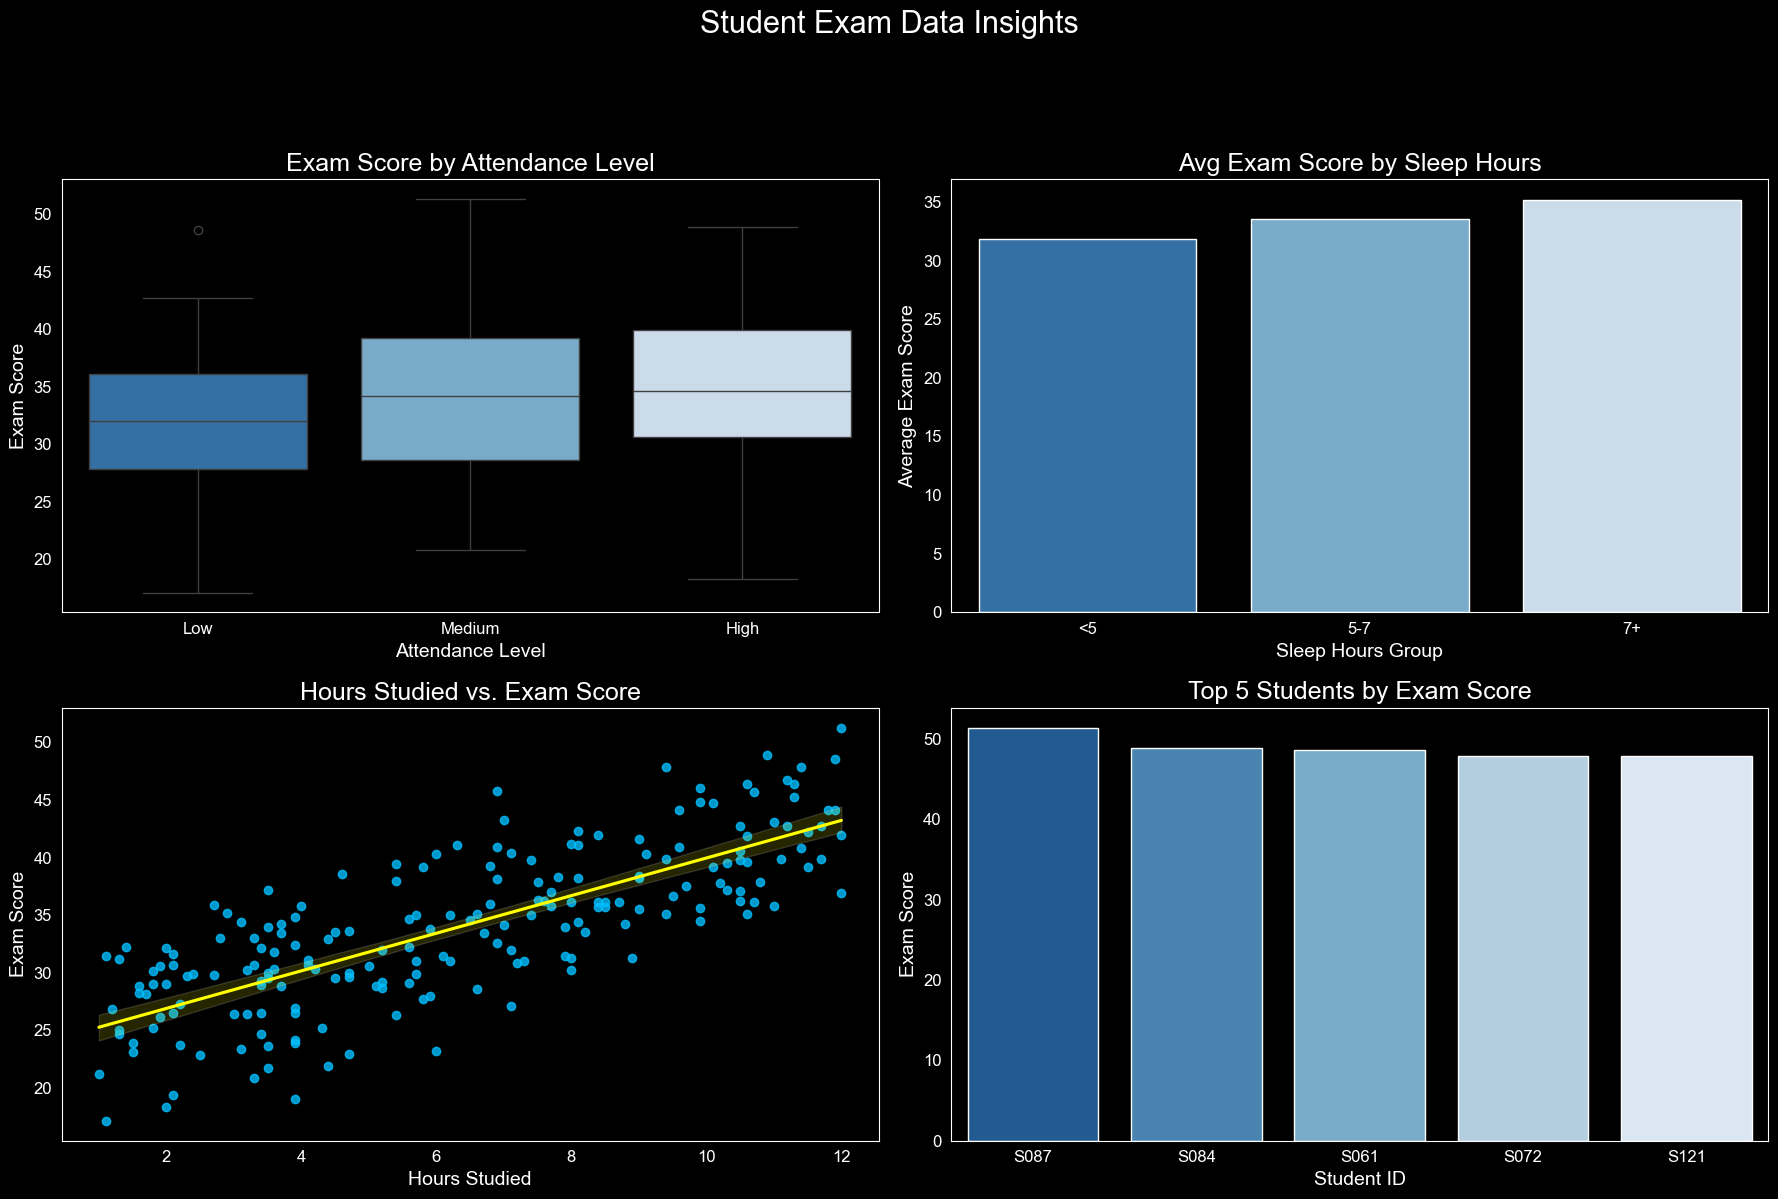

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set dark theme and font sizes for professional look
sns.set_style("dark")
plt.style.use("dark_background")
plt.rcParams.update({'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 14, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'legend.fontsize': 12})

# Load data
df = pd.read_csv('student_exam_scores.csv')

# --- Data Cleaning ---
print('🔍 Data Cleaning...')
print('Missing values per column:')
print(df.isnull().sum())

# Convert columns to correct types if needed
df['student_id'] = df['student_id'].astype(str)
for col in ['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores', 'exam_score']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values (if any)
df.fillna(df.median(numeric_only=True), inplace=True)

# Remove duplicates if any
df.drop_duplicates(inplace=True)

print('\nData after cleaning:')
print(df.info())

# --- Data Exploration ---
print('\n✨ Quick Stats:')
print(df.describe())

# --- Top Visualizations ---
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Student Exam Data Insights', fontsize=22, y=1.03)

# 1. Boxplot: Exam Score by Attendance Level (binned)
attendance_bins = pd.cut(df['attendance_percent'], bins=[0,60,75,100], labels=['Low','Medium','High'])
sns.boxplot(x=attendance_bins, y=df['exam_score'], palette='Blues_r', ax=axes[0,0])
axes[0,0].set_title('Exam Score by Attendance Level')
axes[0,0].set_xlabel('Attendance Level')
axes[0,0].set_ylabel('Exam Score')

# 2. Barplot: Average Exam Score by Sleep Hours (binned)
sleep_bins = pd.cut(df['sleep_hours'], bins=[0,5,7,10], labels=['<5','5-7','7+'])
sleep_means = df.groupby(sleep_bins)['exam_score'].mean().reindex(['<5','5-7','7+'])
sns.barplot(x=sleep_means.index, y=sleep_means.values, palette='Blues_r', ax=axes[0,1])
axes[0,1].set_title('Avg Exam Score by Sleep Hours')
axes[0,1].set_xlabel('Sleep Hours Group')
axes[0,1].set_ylabel('Average Exam Score')

# 3. Scatter: Hours Studied vs. Exam Score (with regression)
sns.regplot(data=df, x='hours_studied', y='exam_score', scatter_kws={'color':'deepskyblue'}, line_kws={'color':'yellow'}, ax=axes[1,0])
axes[1,0].set_title('Hours Studied vs. Exam Score')
axes[1,0].set_xlabel('Hours Studied')
axes[1,0].set_ylabel('Exam Score')

# 4. Barplot: Top 5 Students by Exam Score
top_students = df.nlargest(5, 'exam_score').sort_values('exam_score', ascending=False)
sns.barplot(x=top_students['student_id'], y=top_students['exam_score'], palette='Blues_r', ax=axes[1,1])
axes[1,1].set_title('Top 5 Students by Exam Score')
axes[1,1].set_xlabel('Student ID')
axes[1,1].set_ylabel('Exam Score')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()